Deep_Learning_Studynotes_(20190629)

study program : https://www.fastcampus.co.kr/data_camp_deeplearning

#### [학습기록]

#### 1. 텐서플로우 기초

In [0]:
import numpy as np
import tensorflow as tf

In [23]:
print (tf.__version__)

2.0.0-beta1


In [0]:
#tf.enable_eager_execution()

In [25]:
tf.executing_eagerly()

True

[Defining Tensors]

In [30]:
m1 = [[1.0, 2.0], 
      [3.0, 4.0]]
m2 = np.array([[1.0, 2.0],
              [3.0, 4.0]], dtype=np.float32)
m3 = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

print(type(m1))
print(type(m2))
print(type(m3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [31]:
t1 = tf.convert_to_tensor(m1, dtype=tf.float32)
t2 = tf.convert_to_tensor(m2, dtype=tf.float32)
t3 = tf.convert_to_tensor(m3, dtype=tf.float32)

print(type(t1))
print(type(t2))
print(type(t3))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


[Numpy Compatibility]

In [32]:
ndarray = np.ones([3, 3])
print(ndarray,'\n')

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor,'\n')


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1),'\n')
# tf.add도 쓸 수 있다. 여기서 보여주고 싶은 것은 넘파이와 텐서플로우가 호환이 된다는 것이다.

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64) 

And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]] 

The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


[Constants]

1.x 버전에서는 변수 선언 후 출력 시 오류가 발생했는데, 2버전은 아래와 같이 바로 출력이 가능하다

1.x 버전에서는 sess.run을 해주고 프린트를 해야 가능한 것이었다.

In [33]:
hello = tf.constant("Hello World!")
print(hello)

tf.Tensor(b'Hello World!', shape=(), dtype=string)


In [35]:
a = tf.constant(1.5)
b = tf.constant(2.5)
print(a)
print(b)

tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)


[Operations]

In [36]:
a_plus_b = tf.add(a, b)
print(a_plus_b)

tf.Tensor(4.0, shape=(), dtype=float32)


In [14]:
a_mul_b = tf.multiply(a, b)
print(a_mul_b)

tf.Tensor(3.75, shape=(), dtype=float32)


[Variables]

머신러닝에서는 결국 w값을 찾는 것이 목적인데 처음에는 이 가중치 w가 어떤 값인지 모르니까 랜덤값으로 채우는 것이다. 

이때 보통은 가우시안 정규분포로 부터 랜덤한 값을 추출해서 쓴다. 아니면 유니폼분포를 쓰는 경우도 있다.

In [37]:
weight = tf.Variable(tf.random_normal_initializer(stddev=0.1)([5, 2]))
# 평균이 0이고 표준편차가 0.1인 가우시안 정규분포 변수를 5행 2열 사이즈로 뽑는다.
print(weight)

# 1.x버전에서는 위와같이 variable을 선언하면 글로벌 베리어블 이니셜라이저 같은 것을 만들고
# 실행하고 저 웨이트를 또 sess.run을 또 실행해줘야 나왔는데 2버전은 바로 실행이 가능하다.

<tf.Variable 'Variable:0' shape=(5, 2) dtype=float32, numpy=
array([[-0.05714906, -0.08460012],
       [ 0.02706867,  0.1198655 ],
       [ 0.06843279,  0.05600017],
       [-0.10192732, -0.05903401],
       [ 0.03159029, -0.03104416]], dtype=float32)>


[Shape, Rank, Axis]

In [38]:
t = tf.constant([1,2,3,4])
print(t.shape)

# 텐서플로우에서 shape를 찍으면 파이썬의 튜플형태로 나온다.

(4,)


In [39]:
t = tf.constant([[1,2],
                 [3,4]])
print(t.shape)

(2, 2)


In [40]:
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]])
print(t.shape)

# 괄호가 4개가 있으니까 일단 4차원이다.
# 이 4를 튜플의 맨 마지막에 써준다.
# 그리고 두번째 닫는괄호가 2개연속 나올때까지 이 괄호가 몇개 나온가 보니까 3개이다.
# 그러면 이 3을 튜플의 마지막에서 두번째로 써준다.
# 그 다음에 두개받는 괄호가 3개닫는 괄호나올때까지 몇번나왔는지 보니까 2개이다.
# 그 다음에 세개닫는 괄호가 네개 단는 괄호나올때까지 몇번나왔는지 보니까 1개이다.
# 그래서 (1,2,3,4)이고 이게 텐서플로우에서 shape이다.

(1, 2, 3, 4)


In [41]:
np.array(
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]
).shape

(1, 2, 3, 4)

[Matmul VS multiply]

In [42]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],
                       [2.]])
print(tf.matmul(matrix1, matrix2))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


In [43]:
print(matrix1*matrix2)

tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)


[Watch out broadcasting]

In [44]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],
                       [2.]])
print(matrix1+matrix2)

tf.Tensor(
[[5. 5.]
 [5. 5.]], shape=(2, 2), dtype=float32)


In [45]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
print(matrix1+matrix2)

tf.Tensor([[5. 5.]], shape=(1, 2), dtype=float32)


[Reduce Mean/Sum]

In [48]:
print(tf.cast(tf.reduce_mean([1., 2.], axis=0),tf.float32))
# reduce_mean은 평균낸다는 것이다.

print(tf.cast(tf.reduce_mean([1, 2], axis=0),tf.int32))

tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(1, shape=(), dtype=int32)


In [49]:
x = [[1., 2.],
     [3., 4.]]


print(tf.reduce_mean(x))

tf.Tensor(2.5, shape=(), dtype=float32)


In [50]:
# 아래와 같이 축을 정해서 reduce_mean을 할 수 있다.
# axis = 0은 행끼리 다 더해서 평균을 내는 것임
print(tf.reduce_mean(x, axis=0))

tf.Tensor([2. 3.], shape=(2,), dtype=float32)


In [51]:
print(tf.reduce_mean(x, axis=1))
# 반면에 axis =1 은 열끼리 더해서 평균을 낸다는 것이다.

tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


In [52]:
print(tf.reduce_mean(x, axis=-1))
# axis = -1은 맨마지막을 의미한다. 
# 0번 1번 축이 두개밖에 없는데 마지막이 1번 축이니까 1번축으로 reduce_mean을 한 것이다.

tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


In [53]:
print(tf.reduce_sum(x))

tf.Tensor(10.0, shape=(), dtype=float32)


In [54]:
print(tf.reduce_sum(x, axis=0))

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [55]:
print(tf.reduce_sum(x, axis=-1))

tf.Tensor([3. 7.], shape=(2,), dtype=float32)


In [56]:
print(tf.reduce_mean(tf.reduce_sum(x, axis=-1)))

tf.Tensor(5.0, shape=(), dtype=float32)


[Argmax with axis]

In [57]:
x = [[5, 6, 7],
     [7, 6, 5]]
print(tf.argmax(x, axis=0))
# argmax는 max값을 찾아서 거기의 index를 리턴하는 것이다.
# 얘도 마찬가지로 축을 정해서 연산할 수 있다.
# axis는 0이니까 행끼리 연산한다는 것이다.

tf.Tensor([1 0 0], shape=(3,), dtype=int64)


In [58]:
print(tf.argmax(x, axis=1))
# 반연에 여기서는 axis가 1이기 때문에 열끼리 연산한다.

tf.Tensor([2 0], shape=(2,), dtype=int64)


In [59]:
print(tf.argmax(x, axis=-1))

tf.Tensor([2 0], shape=(2,), dtype=int64)


[Reshape, squeeze, expand_dims]

In [60]:
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
print(t.shape)

(2, 2, 3)


In [61]:
print(tf.reshape(t, shape=[-1, 3]))
# reshape도 가능하다. 
# -1로 되어 있으면 알아서 채우라는 말인데 무슨말이냐면
# 총 숫자가 12개이고 열이 3개짜리니까 행은 4로해서 채우라는 것이다. 

tf.Tensor(
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]], shape=(4, 3), dtype=int64)


In [62]:
print(tf.reshape(t, shape=[-1, 1, 3]))
# 결국에는 (4,1,3)이 된다.

tf.Tensor(
[[[ 0  1  2]]

 [[ 3  4  5]]

 [[ 6  7  8]]

 [[ 9 10 11]]], shape=(4, 1, 3), dtype=int64)


In [63]:
print(tf.squeeze([[0], [1], [2]]))
# squeeze라는 것은 차원이 여러개 있는것을 한방에 1차원으로 줄여주는 것을 말한다.

tf.Tensor([0 1 2], shape=(3,), dtype=int32)


In [64]:
print(tf.expand_dims([0, 1, 2], 1))
# 반면에 expand_dim이라는 것은 여기서는 얘가 지금 1차원을 하나 뒤에 늘려준다는 것이다.

tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int32)


[One hot]

In [65]:
print(tf.one_hot([0, 1, 2, 0], depth=3))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(4, 3), dtype=float32)


[Type Casting]

In [66]:
print(tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32))

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [67]:
print(tf.cast([True, False, 1 == 1, 0 == 1], tf.int32))

tf.Tensor([1 0 1 0], shape=(4,), dtype=int32)


[Create a Dataset]

In [68]:
a = np.arange(10)
print(a)
ds_tensors = tf.data.Dataset.from_tensor_slices(a)

# 데이터를 사용할 수 있게 전처리를 하면 네트워크에 데이터를 넣어줘야 하기 때문에
# input 데이터랑 정답 레이블을 묶어서 보통 데이터셋이라는 것을 만들고 파이프 라인을 구성한다.

[0 1 2 3 4 5 6 7 8 9]


[Apply Transformations]

In [0]:
ds_tensors = ds_tensors.map(tf.square).shuffle(20).batch(2)
# tf.square = 제곱을해라
# shuffle 괄호 안에 20은 20이라는 공간을 준다는 것이다 위에서는 10개를 만들었기 때문에
# 공간은 10개 이상만 주면 문제 없다.
# 예를 들어서 위와 같이 ds_tensors를 만들면 이걸 가지고 배치를 임의로 하라고 할 수도 있고, 셔플을 할 수도 있다.

[Iterate]

In [70]:
# 데이터 셋을 한번씩 다 쓰는 것을 1에포크라고 한다.
# 보통 1에포크를 돌고나서 데이터셋을 셔플한다음에 또 에포크를 돈다.
print('Elements of ds_tensors:')
for _ in range(3):
  for x in ds_tensors:
    print(x)

Elements of ds_tensors:
tf.Tensor([36 81], shape=(2,), dtype=int64)
tf.Tensor([4 1], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([64  9], shape=(2,), dtype=int64)
tf.Tensor([16 25], shape=(2,), dtype=int64)
tf.Tensor([36 81], shape=(2,), dtype=int64)
tf.Tensor([4 1], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([64  9], shape=(2,), dtype=int64)
tf.Tensor([16 25], shape=(2,), dtype=int64)
tf.Tensor([36 81], shape=(2,), dtype=int64)
tf.Tensor([4 1], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([64  9], shape=(2,), dtype=int64)
tf.Tensor([16 25], shape=(2,), dtype=int64)


#### 2. 선형회귀, 로지스틱 회귀 기초개념

- 선형회귀의 기본적인 목표 -> 정비례 규칙을 찾고 싶다.


- 선형회귀는 딥러닝에서 계속 사용되는 것이다. 히든레이어에서 아웃풋레이어로 가는 마지막과정에서 무조건 선형회귀 아니면 로지스틱 회귀를 쓰기 때문이다. 딥러닝에서 classification을 하게되면 로지스틱 회귀를 쓸 것이고, 선형회귀를 한다면 선형회귀를 쓸 것이다.


- 리그레션은 입력으로 discrete한게 들어갈 수도 있고, continuous한게 들어갈 수도 있는데 출력으로는 continuous한 것을 출력하는 것을 말한다.


- 예를 들어서 내가 갖고 있는 데이터가 키와 몸무게 기록이 있는 학생들의 데이터라고 했을때 새로 전학온 학생의 키가 175cm라면 몸무게는 어떨지, 양의 상관관계가 있는 것인지 찾는 것이다.


- 아래 그림과 같이 이 검정색 점들(데이터)을 가장 잘 표현할 수 있는 직선을 찾고 그 직선위에서 예측을 하는 것이라고 할 수 있다.


- 이 선형회귀를 뉴럴네트워크로 만들면 아래의 그림과 같이 1개의 퍼셉트론이면 충분하다. 활성화 함수는 보통 시그모이드 함수 같은 non-linear 함수가 들어갔지만 선형회귀를 구현할때는 그냥 데이터를 변형없이 그대로 통과시키기만 하면 된다.

![1](https://user-images.githubusercontent.com/41605276/80909993-9a69e300-8d67-11ea-8c67-405a2c762cbe.png)

- 그렇다면 데이터를 표현하는 직선은 여러개가 될텐데 어떤 직선이 가장 좋은 것이고 어떤 직선은 나쁜직선인지 판단할 수 있어야 한다. 그래서 대표적으로 하는 방법이 Residula Sum of Square(잔차제곱합) 또는 mean squared error이다.

![2](https://user-images.githubusercontent.com/41605276/80909997-a6ee3b80-8d67-11ea-9003-5f3f854b9e2a.png)

- 그래서 우리는 이 잔차제곱합을 최소화하는 w와 b를 찾아야 한다. 그러면 어떻게 찾을 것이냐. cost function을 미분에서 최소값(미분=0이되는 점)을 찾아야 한다. 그래서 우리는 w로도 미분하고, b로도 미분하여 w로 미분했을때 0되는 점을 찾으면 그게 loss을 최소화하는 w를 찾는 것이다. b로 미분해서 0되는 점을 찾으면 그때 b값이 loss를 최소화하는 b가 될 것이다.

![3](https://user-images.githubusercontent.com/41605276/80910001-ace41c80-8d67-11ea-9a79-b9f560f17ed2.png)

- 예를 들어서 아래 그림과 같이 x와 y값을 갖는 데이터가 3개 있다고 치자. 이때 이 세점을 가장 잘 설명하는 선형회귀를 한다고하자.

![4](https://user-images.githubusercontent.com/41605276/80910005-b3729400-8d67-11ea-8ca3-0c858ff0ceb0.png)

- 위에서는 간단하게 x가 스칼리인 단순한 형태의 선형회귀를 한 것이었다. 보통 현실에서는 x라는게 스칼라값이 아니라 아래 예시와 같이 벡터값인 멀티베리어블 리니어 리그레션이 대부분이다.

![5](https://user-images.githubusercontent.com/41605276/80910007-b9687500-8d67-11ea-8553-a0b0d9af1465.png)

- 결론적으로 잔차제곱합을 최소화 하는 w를 구하는 공식이 있고, 아래와 같다.

$$\ w = (X^TX)^{-1} X^T y $$

위의 식을 증명하는 과정은 아래와 같다.

y헷 = Xw, e(잔차벡터) = y - y헷 = y - Xw

$$\ \begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray} $$ 

잔차제곱합을 가장 작게하는 가중치 벡터 w를 구하기 위해 잔차제곱합의 그레디언트 벡터(w로 미분)를 구하면 아래와 같다.

$$\ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터여야 한다. 따라서 아래와 같은 식이 나온다.

dRSS / dW = 0

$$\ X^TX w = X^T y $$

$$\ w = (X^TX)^{-1} X^T y $$

단 XTX행렬의 역행렬이 존재해야하고, 양의 정부호 행렬이어야 한다. 또한 X의 각 행렬이 서로 독립이어야 한다. XTX행렬이 역행렬이 존재하지 않다는 의미는 해가 무수히 많거나 해가 없다는 의미이다.


- 선형회귀는 closed form이 위와 같이 존재한다. 최적점을 directly 구할 수 있다는 것이다.

![7](https://user-images.githubusercontent.com/41605276/80910014-c6856400-8d67-11ea-857c-ef24f0152a34.png)

- 위와 같은 경우도 주의해야 한다. 위와 같은 경우는 예를들어서 내가 풀어야 하는 미지수는 두개 인데 데이터를 한개 준 경우이다.


- 선형회귀로 classification도 가능한데 아래 예시와 같이 아웃라이어에는 취약하다는 단점이 있다.

![6](https://user-images.githubusercontent.com/41605276/80910018-cbe2ae80-8d67-11ea-8312-83ffc474f47b.png)

- 보통 잔차를 제곱하기 때문에 잔차가 커질 경우 이것이 극대화 되기 때문에 이런 현상이 있는 것이다. 그래서 잔차제곱합이 아니라 mean absolute error를 쓰기도 한다.


- 어쨌든 이런 문제점 때문에 나온 개념이 시그모이드 함수를 적용하는 것이다. 아주 크거나 아주 작은 데이터에 영향을 받지 않았으면 좋겠고, 바이너리 classification에 맞게 0에서 1사이 값으로 출력하는 것이다. 


- 그래서 선형회귀에 로지스틱 함수를 적용한 것이 로지스틱 선형회귀다. 뉴럴네트워크에서도 퍼셉트론 한개에 활성화 함수로 시그모이드를 집어넣어주면 로지스틱 선형회귀를 구현할 수 있다.

![8](https://user-images.githubusercontent.com/41605276/80910022-d1d88f80-8d67-11ea-87b5-9897f5bbf4c3.png)

- 선형회귀와 마찬가지로 cost function을 정의해줘야 한다. 로지스틱 리그레션의 로스함수는 위에 나와있는 것을 미분하여 나온 결과(아래 수식에서 가장 하단에 있는 빨간색박스, LL)을 최소화 시켜주면 된다. 

![16](https://user-images.githubusercontent.com/41605276/80910027-d8670700-8d67-11ea-9ba0-0c0b26cf79ea.png)

\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k \dfrac{1}{m} \sum_{i=1}^m \big(\mu(x_i; w_k) - y_i  \big ) x_i\\
\end{eqnarray}


- 그러면 로지스틱 회귀분석을 확률적인 관점에서 접근해보자.


- 로지스틱 회귀분석에서 손실함수로 크로스엔트로피를 주로 많이 쓴다. mean squared error를 쓸 수도 있지만 통상적으로는 크로스 엔트로피를 많이 쓴다. 위에서 정의한 로스함수가 베르누이 확률분포의 MLE인데 이게 결국에는 크로스 엔트로피를 말하는 것이다. 

![9](https://user-images.githubusercontent.com/41605276/80910031-ddc45180-8d67-11ea-8eda-8dbcc26c3e68.png)

- 크로스 엔트로피는 그래서 pi에다가 데이터셋의 정답의 분포를 넣고, qi에다가는 내 모델이 예측한 값의 분포를 넣어서 엔트로피를 계산하게 된다. 그래서 이 크로스 엔트로피를 최소화 하는 것은 p와 q의 분포가 가까워 지도록 만들어지는 것이다. 그러면 결과적으로는 H(p)에 p와 q의 쿨벡라이불러 디버전스를 더한 것이 되고 이 값을 최소화 시켜야 한다.

![10](https://user-images.githubusercontent.com/41605276/80910035-e3ba3280-8d67-11ea-8735-c07543766e14.png)

- p와 q가 가까울 수록 KL Divergence가 작아지게 된다. 반면에 멀어질 수록 커진다. 결국에는 크로스엔트로피를 최소화 한다는 것은 KL Divergence 즉, 실제 정답의 확률분포와 내 네트워크가 예측한 확률분포가 최대한 같게 만든다는 것이다.


- 결국에는 아래와 같은 식이 나오고 이 케이스에서는 선형회귀처럼 closed form이 없기 때문에 미분을 사용해서 iterative하게 최적점을 찾아야 한다.

![11](https://user-images.githubusercontent.com/41605276/80910045-ea48aa00-8d67-11ea-9452-61fc10074a63.png)

- 그레디언트가 벡터의 미분이기 때문에 항상 가리키는 방향이 있다. 이 가리키는 방향이 최대로 상승하는 방향이고 그래서 그것의 반대방향으로 조금식 이동해야한다.


- 만개의 데이터가 있다면 만개 데이터를 다 집어넣고 그거에 대해서 loss를 만개 계산하고 로스를 평균해서 그레디언트를 조금 업데이트하고, 다시 만개의 데이터를 이용해서 loss 계산하고 로스를 평균해서 그레디언트를 조금 업데이트하는 이런 과정이 너무 비효율적이어서 나온 것이 SGD 방법이다.


- 미니배치 사이즈를 더 작은 배치사이즈를 가져가면 경험적으로 일반화 성능이 증가한다는 연구결과가 있다. 


- 아래 빨간 글씨와 같이 배치사이즈에 비례해서 learning rate를 키워줘야 한다.

![12](https://user-images.githubusercontent.com/41605276/80910052-f03e8b00-8d67-11ea-9577-e8031dd1f86b.png)

- 로지스틱 회귀분석의 확률적인 관점

![13](https://user-images.githubusercontent.com/41605276/80910054-f6346c00-8d67-11ea-99e9-254a6d53cd44.png)

- 결국에는 Maximum likelihood estimation이 핵심이다. 예를 들어서 어떤 물건을 동전던지기 처럼 던져서 앞면이 나올 확률을 계산한다고 하면 10번던져서 앞면이 6번 나왔다고 하면 MLE를 계산하면 0.6의 확률로 앞면이 나올것이라고 판단할 수 있는 것이다. 다시말해서 p(앞면이 나올 확률)가 얼마면 10번 던졌을때 6번 나올 확률이 최대가 될 것이냐이다.


- 선형회귀는 가우시안 정규분포를 가정하고 한다. 그래서 내 네트워크에서 가우시안 정규분포를 표현하려면 평균과 분산이 필요한데 보통 분산을 1로 넣고 평균을 내 네트워크의 아웃풋값을 넣는것이다. 다시말해 내 네트워크는 y에 대한 평균값을 예측하는 것이다. 그래서 이 내 네트워크의 예측값이 얼마가 되면 y의 평균이 제일 확률이 커질지 (평균이 y가 되면 확률이 커질 것이다) 구하는 것이다. 그래서 세타랑 x가 주어지면 y가 나올 확률을 최대화하는 모델을 만드는 것이다. 


- 이를 위해 아래 그림과 같은 개념을 가정한다. 이러한 가정을 바탕으로 NLL을 최소화 시키는 것을 목적으로 한다.

![14](https://user-images.githubusercontent.com/41605276/80910061-fb91b680-8d67-11ea-98f0-71bb8eeed162.png)

- 그래서 확률론적인 관점에서의 선형회귀에서 평균을 예측한다는 것은 아래 그림과 같다. y가 세타(w)x + e(엡실론 = 노이즈)로 되어 있어서 원래 직선이 있는데 노이즈의 변동이 있을 수 있다는 것이다. 그래서 나는 아래 그림에서 빨간선을 예측하고 싶다는 것이다. 그리고 로지스틱 리그레션에서는 베르누이 분포를 가정하기 때문에 아래처럼 표현할 수 있다. 그래서 x랑 세타가 주어졌을때 나오는 모델의 예측값이 1이될 확률을 구하는 것이다. 


- 결론적으로는 확률론적인 관점에서 각각 가우시안분포와 베르누이 분포의 log likelihood가 되는 것이다. classification에서 MSE는 거의 안쓴다고 보면 된다. 딥러닝에서 back propogation할때 문제가 발생하기 때문이다.

![15](https://user-images.githubusercontent.com/41605276/80910069-02b8c480-8d68-11ea-8271-cc8d4843345c.png)

#### 3. 텐서플로우로 구현하는 선형회귀 기초예시

In [0]:
# For reproducibility
np.random.seed(777)

In [6]:
# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
#slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
#intercept = 2.

slopes = 1
intercept = np.random.normal(2, 0.2, 100).astype(np.float32) 
# intercept는 y절편을 말하는건데 가우시안노이즈를 추가했다.
# 평균을 2로하고 표준편차를 0.2로해서 숫자를 100개를 뽑은 것이다.

# outputs
y = x * slopes + intercept

print(slopes,'\n')
print(intercept,'\n')

1 

[1.9547869 1.824274  1.8056791 2.010833  2.0122182 2.2347631 2.2287183
 2.077177  2.1068094 2.1087186 1.9466289 1.91932   1.9549191 1.8770003
 2.2847564 2.2275352 1.8689951 2.1924345 2.1293433 2.0995014 1.7575988
 1.6364014 2.181351  2.2058055 2.099426  2.3211308 1.9810917 2.0393143
 2.2172887 2.1068354 2.0735013 1.4907011 1.9785335 1.9774646 1.9980901
 1.8917161 1.8111721 2.1072378 1.9168694 2.064694  2.0898936 2.4954464
 1.9638982 2.0016527 1.9123851 2.2182038 2.0242357 1.8930213 2.2925956
 1.7977242 2.0249991 1.6656373 2.3446465 2.1401873 2.3759246 2.336075
 1.9173069 1.8972042 1.9103351 1.9130999 2.0994534 2.0899262 1.9150633
 1.6544553 1.8792466 2.0961046 2.0391808 2.3070164 1.9809688 1.7562392
 1.8053478 2.2675219 1.9953964 1.8409156 2.1230865 1.8717061 1.9040357
 1.8411719 1.8584155 1.96766   2.0622861 1.5282812 2.181365  2.26566
 2.1062274 2.1265802 2.1384265 1.7657336 2.1723344 1.578645  1.905852
 1.8994441 1.9445403 2.231417  2.2262204 1.7743596 1.9463279 2.162859
 1.8059

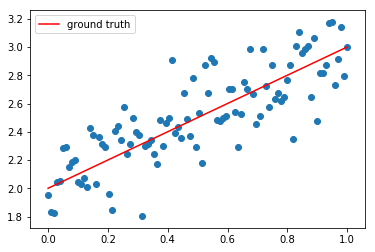

In [7]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [8]:
x.dtype

dtype('float32')

In [9]:
y.dtype

dtype('float32')

In [10]:
x.shape

(100,)

In [11]:
y.shape

(100,)

In [0]:
# Computation
## Variables = Parameters = Weights
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

# y = 0.1x + 0 부터 시작하겠다는 의미이다.

In [14]:
learning_rate = 0.1

loss_list, w_list, b_list = [], [], []

for epoch in range(20): 
# 데이터가 100가 있는데 미니배치를 하지는 않을 것이고 통째로 20 에포크를 돈다는 것이다.
    with tf.GradientTape() as tape: 
        ## prediction = y_hat = hypothesis
        preds = x * w + b # (100,)
        loss = tf.reduce_mean(tf.square(preds - y))
        
    w_grad, b_grad = tape.gradient(loss, [w, b])
    # 그레디언트로 w와 b로 미분해라
    w.assign_sub(learning_rate * w_grad)
    # 이전의 w값에다가 러닝레이트 곱하기 w그레디언트 계산한 것을 할당해라
    b.assign_sub(learning_rate * b_grad)
    print(epoch+1, "\t", loss.numpy(), "\t", w.numpy(), "\t", b.numpy())
    loss_list.append(loss.numpy())
    w_list.append(w.numpy())
    b_list.append(b.numpy())

1 	 6.148821 	 0.36019328 	 0.49210268
2 	 3.443053 	 0.55374247 	 0.8597654
3 	 1.9355677 	 0.697557 	 1.1345408
4 	 1.0956739 	 0.80425787 	 1.3399796
5 	 0.6277118 	 0.88326555 	 1.4936606
6 	 0.36696243 	 0.94161135 	 1.6087046
7 	 0.22165686 	 0.9845434 	 1.6949052
8 	 0.14066862 	 1.0159788 	 1.7595725
9 	 0.095513895 	 1.0388412 	 1.8081628
10 	 0.070323855 	 1.0553128 	 1.8447487
11 	 0.056257486 	 1.067022 	 1.8723704
12 	 0.048389196 	 1.0751845 	 1.8932967
13 	 0.04397484 	 1.0807074 	 1.9092215
14 	 0.041485578 	 1.0842679 	 1.9214091
15 	 0.04006961 	 1.086371 	 1.9308032
16 	 0.03925238 	 1.0873938 	 1.9381081
17 	 0.038769484 	 1.0876175 	 1.9438498
18 	 0.03847358 	 1.0872521 	 1.9484208
19 	 0.038282588 	 1.0864542 	 1.9521141
20 	 0.038150713 	 1.0853403 	 1.9551486


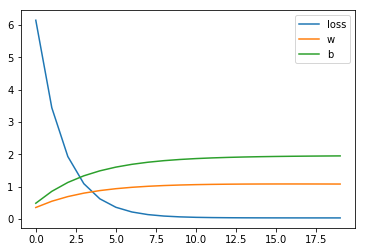

In [15]:
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()

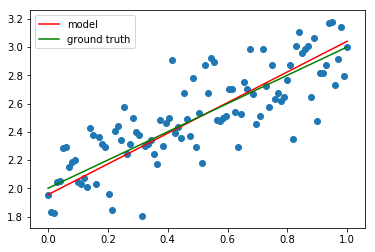

In [16]:
# 빨간색 선이 모델에서 예측한 선, 초록색이 정답
plt.scatter(x, y)
plt.plot(x, x * w_list[-1] + b_list[-1], label="model", c="r")
plt.plot(x, x * 1 + 2., label="ground truth", c="g")
plt.legend()
plt.show()

#### 4. 텐서플로우의 캐라스로 구현하는 선형회귀 기초예시

In [0]:
# For reproducibility
np.random.seed(777)

In [0]:
# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
#slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
#intercept = 2.

slopes = 1
intercept = np.random.normal(2, 0.2, 100).astype(np.float32)

# outputs
y = x * slopes + intercept

In [5]:
slopes

1

In [6]:
intercept

array([1.9063582, 1.835435 , 1.9869239, 1.8573276, 2.1812701, 2.1532474,
       2.1652107, 1.7352635, 1.6495111, 2.2004898, 2.1089618, 2.3790321,
       1.8461285, 1.7193809, 1.8735065, 1.8882253, 1.7533537, 1.9120992,
       2.1829574, 2.053008 , 1.723326 , 2.1371024, 2.0912182, 1.9077251,
       2.01894  , 1.6914377, 2.495874 , 2.0913734, 1.9372255, 2.0042074,
       2.1921587, 2.0116966, 1.9107935, 2.0638394, 2.1682336, 1.6934476,
       1.9436831, 2.3488905, 1.8651522, 2.1176803, 2.3608727, 2.41125  ,
       2.2909164, 1.9723177, 2.0685744, 1.8544763, 1.7192107, 1.7518778,
       1.9113035, 1.990535 , 2.151537 , 1.9695828, 1.9457442, 1.8800321,
       1.5946192, 2.0660684, 1.9338338, 1.9930116, 2.0579495, 1.878746 ,
       1.9463191, 2.2382956, 2.0315228, 2.2349648, 2.264182 , 1.8303926,
       2.1491416, 1.9376757, 1.7897869, 1.7847006, 2.090122 , 2.0817482,
       1.7140917, 2.2034855, 1.9836458, 1.9232163, 1.9523549, 2.0017576,
       2.1040938, 2.080741 , 1.9196435, 1.860551 , 

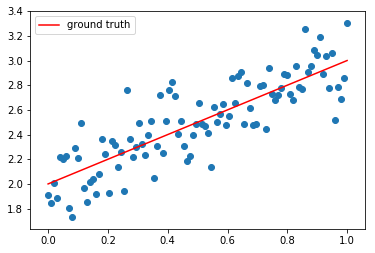

In [8]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [9]:
x.dtype

dtype('float32')

In [10]:
y.dtype

dtype('float32')

In [11]:
x.shape

(100,)

In [12]:
y.shape

(100,)

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
# dense layer라고해서 fully connected layer이다.
# 하나의 입력이 있고 하나의 units(출력의 갯수)가 있는 것이다.
# input shape = 1로 되어 있는데 데이터 100개가 있고 이게 다 들어갈거지만 
# 데이터가 하나씩 스칼라로 들어가기 때문에 1이다.

In [0]:
model = tf.keras.models.Sequential([l0])
# 모델.시퀀스에 레이어를 넣어주면 된다.

In [20]:
model.summary()
# 레이어가 하나이고 입력으로 들어갈 것은 
# (None, 1)은 None은 항상 배치사이즈이다. 
# 데이터는 배치사이즈 만큼 들어갈거고 우리는 100개 다 집어넣을 것이다.
# 그리고 아웃풋은 항상 1로 나오는 걸로 할 것이다.
# 파라미터는 w랑 b 두개이다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(0.1))

In [16]:
history = model.fit(x, y, epochs=20)

Train on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 7ms/sample - loss: 5.3434
Epoch 2/20
100/100 [==============================] - 0s 93us/sample - loss: 0.5485
Epoch 3/20
100/100 [==============================] - 0s 90us/sample - loss: 0.1098
Epoch 4/20
100/100 [==============================] - 0s 89us/sample - loss: 0.0609
Epoch 5/20
100/100 [==============================] - 0s 104us/sample - loss: 0.0569
Epoch 6/20
100/100 [==============================] - 0s 79us/sample - loss: 0.0542
Epoch 7/20
100/100 [==============================] - 0s 97us/sample - loss: 0.0522
Epoch 8/20
100/100 [==============================] - 0s 97us/sample - loss: 0.0505
Epoch 9/20
100/100 [==============================] - 0s 86us/sample - loss: 0.0493
Epoch 10/20
100/100 [==============================] - 0s 113us/sample - loss: 0.0483
Epoch 11/20
100/100 [==============================] - 0s 72us/sample - loss: 0.0474
Epoch 12/20
100/100 [==============================]

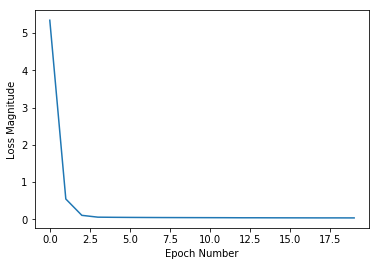

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [18]:
model.variables[0].numpy(), model.variables[1].numpy()
# 0번은 w, 1번은 b를 말하는 것이다.

(array([[0.82106805]], dtype=float32), array([2.0804424], dtype=float32))

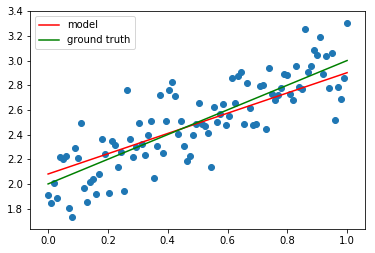

In [19]:
plt.scatter(x, y)
plt.plot(x, x * model.variables[0][0].numpy() + model.variables[1].numpy(), label="model", c="r")
plt.plot(x, x * 1 + 2., label="ground truth", c="g")
plt.legend()
plt.show()

#### 5. 실제 데이터를 이용한 선형회귀 구현예시

- 사용한 데이터 : birth_life_2010.txt


- 독립변수 : 국가별 평균출생률


- 종속변수 : 국가별 기대수명

In [0]:
#DATA_FILE = './data/birth_life_2010.txt'
DATA_FILE = '/content/gdrive/My Drive/TensorFlow_Training_13th/data/birth_life_2010.txt'

In [0]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [21]:
data, n_samples = read_birth_life_data(DATA_FILE)
data[:3]

array([[ 1.822  , 74.82825],
       [ 3.869  , 70.81949],
       [ 3.911  , 72.15066]], dtype=float32)

In [0]:
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [18]:
for epoch in range(100):
    total_loss = 0.
    for x, y in data:
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        # sgd라는 옵티마이저를 이용해서 그레디언트를 업데이트 해달라는 의미이고
        # grads and vars라는 곳에는 그레디언트랑 weight 바이어스를 zip으로 묶어서 넣어주면 된다.
        total_loss += loss
    print('Epoch {0}: {1}'.format(epoch+1, total_loss/n_samples))

Epoch 1: 1656.550048828125
Epoch 2: 957.05224609375
Epoch 3: 845.3574829101562
Epoch 4: 751.33642578125
Epoch 5: 668.1957397460938
Epoch 6: 594.6158447265625
Epoch 7: 529.498779296875
Epoch 8: 471.8717956542969
Epoch 9: 420.87432861328125
Epoch 10: 375.7457275390625
Epoch 11: 335.8111877441406
Epoch 12: 300.47357177734375
Epoch 13: 269.2049865722656
Epoch 14: 241.5377655029297
Epoch 15: 217.05789184570312
Epoch 16: 195.3992156982422
Epoch 17: 176.23704528808594
Epoch 18: 159.28453063964844
Epoch 19: 144.2869415283203
Epoch 20: 131.0201873779297
Epoch 21: 119.28470611572266
Epoch 22: 108.90458679199219
Epoch 23: 99.72322845458984
Epoch 24: 91.60327911376953
Epoch 25: 84.4225845336914
Epoch 26: 78.07245635986328
Epoch 27: 72.45730590820312
Epoch 28: 67.49275970458984
Epoch 29: 63.103614807128906
Epoch 30: 59.22303771972656
Epoch 31: 55.793113708496094
Epoch 32: 52.76158905029297
Epoch 33: 50.08254623413086
Epoch 34: 47.715213775634766
Epoch 35: 45.623287200927734
Epoch 36: 43.77528762817

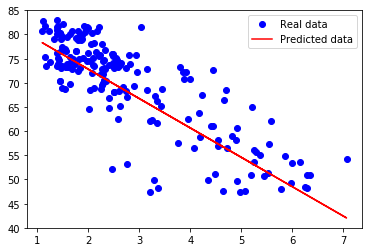

In [19]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

#### 6. 실제 데이터를 이용한 선형회귀 구현예시(미니배치를 적용해보자)

In [0]:
#DATA_FILE = './data/birth_life_2010.txt'
DATA_FILE = '/content/gdrive/My Drive/TensorFlow_Training_13th/data/birth_life_2010.txt'

In [0]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data(DATA_FILE)

In [0]:
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [12]:
batch_size = 10
n_epoch = 100

total_steps = int(n_samples/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for i in range(total_steps):
        x = data[i*batch_size:(i+1)*batch_size, 0]
        y = data[i*batch_size:(i+1)*batch_size, 1]
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        total_loss += loss / total_steps
    print('Epoch {0}: {1}'.format(epoch+1, total_loss))

Epoch 1: 265.4019470214844
Epoch 2: 276.8383483886719
Epoch 3: 248.3880157470703
Epoch 4: 222.95660400390625
Epoch 5: 200.50357055664062
Epoch 6: 180.68170166015625
Epoch 7: 163.18255615234375
Epoch 8: 147.73382568359375
Epoch 9: 134.09532165527344
Epoch 10: 122.0547103881836
Epoch 11: 111.42464447021484
Epoch 12: 102.03982543945312
Epoch 13: 93.75440216064453
Epoch 14: 86.4394302368164
Epoch 15: 79.98108673095703
Epoch 16: 74.27924346923828
Epoch 17: 69.24494934082031
Epoch 18: 64.80011749267578
Epoch 19: 60.87559509277344
Epoch 20: 57.410587310791016
Epoch 21: 54.35100173950195
Epoch 22: 51.649654388427734
Epoch 23: 49.26433181762695
Epoch 24: 47.15803909301758
Epoch 25: 45.29821014404297
Epoch 26: 43.655887603759766
Epoch 27: 42.20565414428711
Epoch 28: 40.92494201660156
Epoch 29: 39.793941497802734
Epoch 30: 38.79512023925781
Epoch 31: 37.912994384765625
Epoch 32: 37.13389587402344
Epoch 33: 36.4458122253418
Epoch 34: 35.838050842285156
Epoch 35: 35.30128479003906
Epoch 36: 34.8270

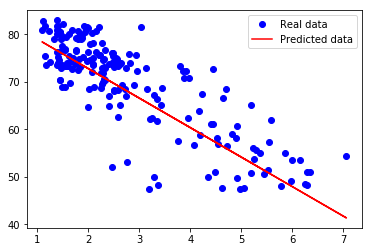

In [13]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

#### 7. 실제 데이터를 이용한 선형회귀 구현예시(미니배치를 적용해보자 + 텐서플로우의 유용한 매서드를 이용)

In [0]:
batch_size = 10
n_epoch = 100

In [0]:
#DATA_FILE = './data/birth_life_2010.txt'
DATA_FILE = '/content/gdrive/My Drive/TensorFlow_Training_13th/data/birth_life_2010.txt'

In [0]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data(DATA_FILE)

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
dataset = dataset.shuffle(1000).batch(10)

In [0]:
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [10]:
total_steps = int(n_samples/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset:        
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        total_loss += loss / total_steps
    print('Epoch {0}: {1}'.format(epoch+1, total_loss))

Epoch 1: 1742.0859375
Epoch 2: 1126.128662109375
Epoch 3: 979.6088256835938
Epoch 4: 852.522216796875
Epoch 5: 742.4463500976562
Epoch 6: 647.1064453125
Epoch 7: 564.5300903320312
Epoch 8: 493.0089416503906
Epoch 9: 431.0635986328125
Epoch 10: 377.412109375
Epoch 11: 330.9443054199219
Epoch 12: 290.6987609863281
Epoch 13: 255.8425750732422
Epoch 14: 225.65428161621094
Epoch 15: 199.5089874267578
Epoch 16: 176.86538696289062
Epoch 17: 157.25486755371094
Epoch 18: 140.27125549316406
Epoch 19: 125.56282806396484
Epoch 20: 112.8250961303711
Epoch 21: 101.79405212402344
Epoch 22: 92.24114227294922
Epoch 23: 83.96859741210938
Epoch 24: 76.80487823486328
Epoch 25: 70.60147094726562
Epoch 26: 65.22976684570312
Epoch 27: 60.57827377319336
Epoch 28: 56.55058288574219
Epoch 29: 53.06315612792969
Epoch 30: 50.04361343383789
Epoch 31: 47.42922592163086
Epoch 32: 45.16574478149414
Epoch 33: 43.20611572265625
Epoch 34: 41.509586334228516
Epoch 35: 40.04093551635742
Epoch 36: 38.76959991455078
Epoch 3

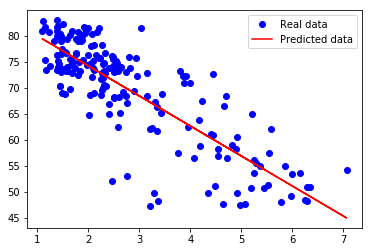

In [11]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

#### 8. tensorflow를 이용한 logistic regression 구현실습 1

## Pima Indians Diabetes Dataset for Binary Classification

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

This dataset can be downloaded from https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

이 dataset의 몇가지 주요 항목을 살펴보면 다음과 같습니다

- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지

8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다.

1. 임신 횟수
2. 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
3. 이완기 혈압 (mm Hg)
4. 삼두근 피부 두겹 두께 (mm)
5. 2 시간 혈청 인슐린 (mu U/ml)
6. 체질량 지수
7. 당뇨 직계 가족력
8. 나이 (세)
9. 5년 이내 당뇨병이 발병 여부

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from sklearn.preprocessing import MinMaxScaler

print(tf.__version__)

2.0.0-beta1


In [0]:
#tf.enable_eager_execution()

In [0]:
#DATA_FILE = './data/pima-indians-diabetes.csv'
DATA_FILE = '/content/gdrive/My Drive/TensorFlow_Training_13th/data/pima-indians-diabetes.csv'

In [0]:
xy = np.loadtxt(DATA_FILE, delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]
# 여기서 -1이라는 것은 맨 마지막 부터인것은 동일하나 대괄호가 들어가면 디멘전이 달라지게 된다.

print(x_train.shape, y_train.shape)
print(xy)

(768, 8) (768, 1)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [0]:
# 피쳐들의 스케일이 다르면 가중치를 곱해져서 더할건데 이때 스케일이 큰숫자가 가장 영향력이 커지기 때문에
# 모든데이터에서 이 데이터들 중에 미니멈값을 뺀 숫자를 맥시멈에서 미니멈을 뺀 것을 나눠주게 된다.
# 통상 피쳐들을 0 ~ 1 사이의 값으로 노멀라이징하는 전처리를 해주게 된다.

# 참고로 다음과 같은 패키지를 임포트하여도 됨
# from sklearn.preprocessing import MinMaxScaler

def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)
  
  # 여기서 10의 -7승이 왜 들어갔냐면 모든숫자가 다 같으면 맥시멈 - 미니멈이 0이 되기 때문에 그것을 방지하기 위함이다.

In [0]:
x_train = MinMaxScaler(x_train)
x_train

array([[0.3529412 , 0.74371856, 0.59016395, ..., 0.5007451 , 0.23441501,
        0.48333332],
       [0.05882353, 0.42713568, 0.5409836 , ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.919598  , 0.52459013, ..., 0.34724292, 0.25362936,
        0.18333334],
       ...,
       [0.29411766, 0.6080402 , 0.59016395, ..., 0.390462  , 0.07130657,
        0.15      ],
       [0.05882353, 0.63316584, 0.4918033 , ..., 0.44858423, 0.11571307,
        0.43333334],
       [0.05882353, 0.46733668, 0.57377046, ..., 0.45305514, 0.10119555,
        0.03333334]], dtype=float32)

In [0]:
batch_size = x_train.shape[0]
n_epoch = 1000
learning_rate = 0.1

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(batch_size)

In [0]:
w = tf.Variable(tf.random_normal_initializer()([8, 1]))
# 8행 1열 매트릭스가 되야지 길이가 8짜리 x가 들어오면 곱할 수 있기 때문이다.
# 그래서 8값에 입력의 길이를 보통 넣어주게 된다.

b = tf.Variable(tf.random_normal_initializer()([1]))

In [0]:
def logistic_regression(inputs):
    hypothesis = tf.keras.activations.sigmoid(tf.matmul(inputs, w) + b)
    return hypothesis

In [0]:
def loss_fn(inputs, labels):
    hypothesis = logistic_regression(inputs)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(labels, hypothesis))
    return loss

In [0]:
def grad(inputs, labels):
    hypothesis = logistic_regression(inputs)
    with tf.GradientTape() as tape:
        loss = loss_fn(inputs, labels)
    grads = tape.gradient(loss, [w, b])
    return grads

In [0]:
def accuracy_fn(inputs, labels):
    hypothesis = logistic_regression(inputs)
    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    # true는 1.0, false는 0.0을 리턴해줄 것이다.
    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, labels), dtype=tf.float32))
    return accuracy

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [0]:
total_steps = int(x_train.shape[0]/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset: 
        grads = grad(x, y)        
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        loss = loss_fn(x, y)
        total_loss += loss / total_steps
    if (epoch+1) % 10 == 0:
        print('Epoch {0}: {1:.8f}'.format(epoch+1, total_loss))

Epoch 10: 0.67067021
Epoch 20: 0.66268939
Epoch 30: 0.65868026
Epoch 40: 0.65606815
Epoch 50: 0.65396786
Epoch 60: 0.65206867
Epoch 70: 0.65026015
Epoch 80: 0.64850199
Epoch 90: 0.64677942
Epoch 100: 0.64508677
Epoch 110: 0.64342165
Epoch 120: 0.64178276
Epoch 130: 0.64016962
Epoch 140: 0.63858140
Epoch 150: 0.63701773
Epoch 160: 0.63547802
Epoch 170: 0.63396186
Epoch 180: 0.63246888
Epoch 190: 0.63099843
Epoch 200: 0.62955028
Epoch 210: 0.62812376
Epoch 220: 0.62671870
Epoch 230: 0.62533456
Epoch 240: 0.62397087
Epoch 250: 0.62262732
Epoch 260: 0.62130350
Epoch 270: 0.61999905
Epoch 280: 0.61871356
Epoch 290: 0.61744678
Epoch 300: 0.61619812
Epoch 310: 0.61496741
Epoch 320: 0.61375433
Epoch 330: 0.61255842
Epoch 340: 0.61137944
Epoch 350: 0.61021698
Epoch 360: 0.60907078
Epoch 370: 0.60794050
Epoch 380: 0.60682589
Epoch 390: 0.60572672
Epoch 400: 0.60464257
Epoch 410: 0.60357314
Epoch 420: 0.60251826
Epoch 430: 0.60147756
Epoch 440: 0.60045081
Epoch 450: 0.59943789
Epoch 460: 0.598438

In [0]:
print('Accuracy: {}'.format(accuracy_fn(x_train, y_train)))

Accuracy: 0.7200520634651184


#### 9. tensorflow를 이용한 logistic regression 구현실습 2

(MLP로 Classification 하는 모델구현)

## Importing Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0-beta1
2.2.4-tf


## Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [0]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [0]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [0]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

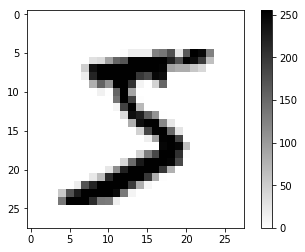

In [0]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()

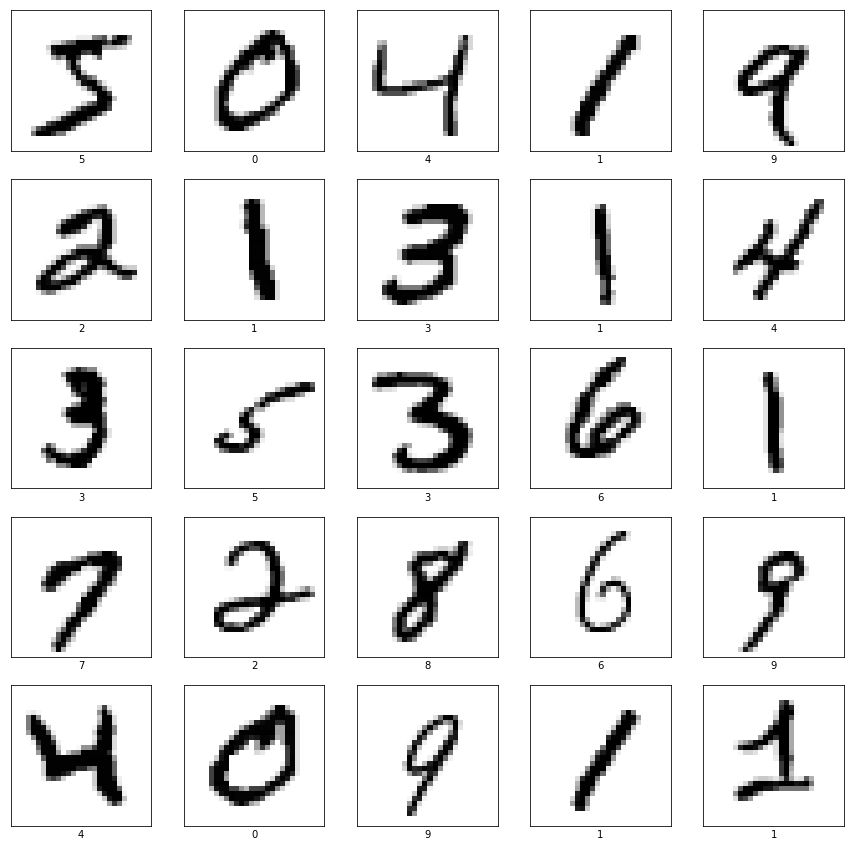

In [0]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
    
train_labels = to_categorical(train_labels, n_class)
test_labels = to_categorical(test_labels, n_class)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## Model Function

In [0]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomNormal(),
                                activation='softmax'))    
    return model

In [0]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Loss Function

In [0]:
def loss_fn(model, images, labels):
    predictions = model(images, training=True)
    loss = tf.reduce_mean(keras.losses.categorical_crossentropy(labels, predictions))   
    return loss

## Calculating Gradient & Updating Weights

In [0]:
def train(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

## Caculating Model's Accuracy

In [0]:
def evaluate(model, images, labels):
    predictions = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    
    return accuracy

## Optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Training

In [0]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        train(model,images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)        
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')

Learning started. It takes sometime.


W0706 04:04:00.560467 139733226547072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 1 loss = 0.62537342 train accuracy =  0.8450 test accuracy =  0.9039
Epoch: 2 loss = 0.34447038 train accuracy =  0.9061 test accuracy =  0.9140
Epoch: 3 loss = 0.30790135 train accuracy =  0.9153 test accuracy =  0.9180
Epoch: 4 loss = 0.29076752 train accuracy =  0.9192 test accuracy =  0.9222
Epoch: 5 loss = 0.28040630 train accuracy =  0.9218 test accuracy =  0.9239
Epoch: 6 loss = 0.27327609 train accuracy =  0.9237 test accuracy =  0.9250
Epoch: 7 loss = 0.26795337 train accuracy =  0.9256 test accuracy =  0.9254
Epoch: 8 loss = 0.26376852 train accuracy =  0.9266 test accuracy =  0.9252
Epoch: 9 loss = 0.26036763 train accuracy =  0.9274 test accuracy =  0.9257
Epoch: 10 loss = 0.25752684 train accuracy =  0.9283 test accuracy =  0.9261
Epoch: 11 loss = 0.25509214 train accuracy =  0.9290 test accuracy =  0.9269
Epoch: 12 loss = 0.25297555 train accuracy =  0.9298 test accuracy =  0.9274
Epoch: 13 loss = 0.25111151 train accuracy =  0.9304 test accuracy =  0.9275
Epoch: 1

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

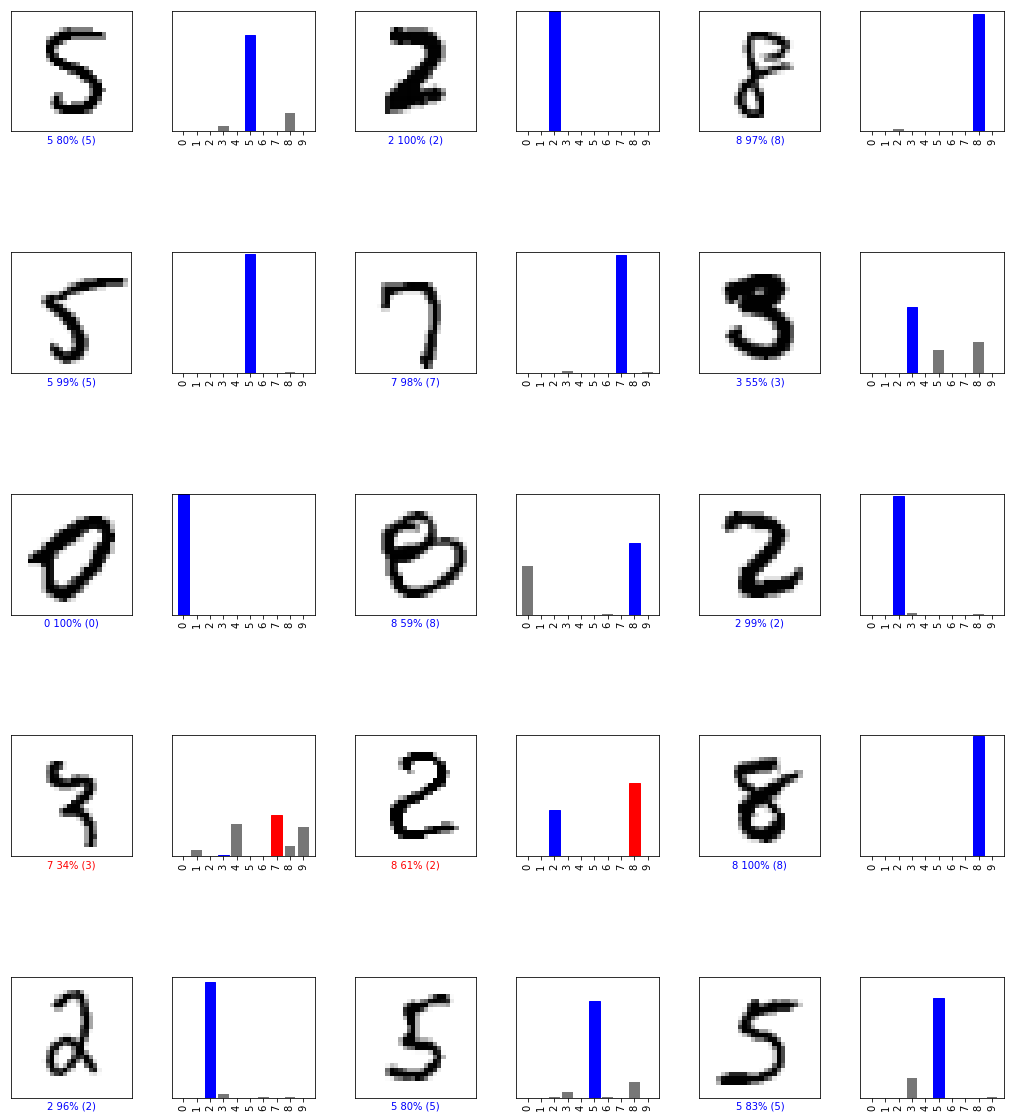

In [0]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break